### Project 2: (10 points)
##### Total (20 points) --> your total will divided by 2 to get 10 points.

To demonstrate clustring, we will be use an adapted version of the glass dataset from the University of California – Irvine.
This data contains 218 observations and 9 features corresponding to the percent weight of various oxides found in glass:

* RI: refractive index
* Na: weight percent in sodium
* Mg: weight percent in magnesium
* Al: weight percent in aluminum
* Si: weight percent in silicon
* K: weight percent in potassium
* Ca: weight percent in calcium
* Ba: weight percent in barium
* Fe: weight percent in iron

In this case study, we will use the refractive index (RI) and weight percent in each oxide to segment the glass type.

**Dataset:**
You can find the dataset (glass.csv) under the datasets section on the Canvas.

### Step to do:

        1. Importing Packages Required:

In [3]:
#
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import numpy as np

    2. Read the Data in the Memory.

In [5]:
df = pd.read_csv("glass.csv")
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11


    3. Print the Size of the Dataset and Printing the First Few Rows of the Dataset

In [14]:
print("The shape of the dateset:", df.shape)

The shape of the dateset: (218, 9)


In [17]:
df.head(15)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11


    4. Look for some basic data frame information  ( 1 point)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      218 non-null    float64
 1   Na      218 non-null    float64
 2   Mg      218 non-null    float64
 3   Al      218 non-null    float64
 4   Si      218 non-null    float64
 5   K       218 non-null    float64
 6   Ca      218 non-null    float64
 7   Ba      218 non-null    float64
 8   Fe      218 non-null    float64
dtypes: float64(9)
memory usage: 15.5 KB


In [19]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,218.000000,218.000000,218.000000,218.000000,218.00000,218.000000,218.000000,218.000000,218.000000
mean,1.518109,13.599037,2.330505,1.570367,72.74555,0.431468,8.799083,0.364358,0.049679
std,0.003002,0.873300,1.643503,0.539291,0.76070,0.435318,1.307588,0.647118,0.086666
min,1.511310,10.730000,0.000000,0.290000,69.81000,0.000000,5.430000,0.000000,0.000000
25%,1.516333,12.990000,0.000000,1.230000,72.39250,0.052500,8.270000,0.000000,0.000000
50%,1.517390,13.440000,3.430000,1.445000,72.90500,0.540000,8.590000,0.000000,0.000000
75%,1.518467,14.320000,3.580000,1.930000,73.13500,0.610000,9.015000,0.610000,0.090000
max,1.533930,15.790000,4.490000,2.880000,75.18000,2.700000,16.190000,3.150000,0.350000


In [20]:
df.dtypes

RI    float64
Na    float64
Mg    float64
Al    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object

    5. Remove any possible order effects in the data by shuffle the rows prior to building any models and save it as a new data frame object.  ( 1 point)


In [26]:
# Shuffle the rows
df_shuffled = df.sample(frac=1, random_state=42)  # You can set a random_state for reproducibility

# Save the shuffled DataFrame as a new object or overwrite the original DataFrame
df_shuffled.to_csv('shuffled_data.csv', index=False)  # Save it to a CSV file, for example

print(df_shuffled.head(15))
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head(5)

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe
100  1.51655  12.75  2.85  1.44  73.27  0.57  8.79  0.11  0.22
215  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.00
139  1.51674  12.87  3.56  1.64  73.14  0.65  7.99  0.00  0.00
178  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00
15   1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.00  0.00
154  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08
170  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00
73   1.51631  13.34  3.57  1.57  72.87  0.61  7.89  0.00  0.00
207  1.51508  15.15  0.00  2.25  73.50  0.00  8.34  0.63  0.00
140  1.51690  13.33  3.54  1.61  72.54  0.68  8.11  0.00  0.00
189  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00
30   1.51768  12.65  3.56  1.30  73.08  0.61  8.69  0.00  0.14
211  1.51617  14.95  0.00  2.27  73.30  0.00  8.71  0.67  0.00
9    1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.00  0.11
67   1.52152  13.05  3.65  0.87  72.32  0.19  9.85  0.0

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51655,12.75,2.85,1.44,73.27,0.57,8.79,0.11,0.22
1,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
2,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00
3,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00
4,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00


    6. Transform each observation into a z-score  ( 1 point)

In [28]:
from scipy.stats import zscore
# Calculate the z-scores for each observation using mean and std
df_zscored = (df_shuffled - df_shuffled.mean()) / df_shuffled.std()
df_zscored.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.519340,-0.972217,0.316090,-0.241738,0.689430,0.318232,-0.006946,-0.393063,1.965264
1,-0.569309,0.882817,-1.418010,2.168834,0.137307,-0.991155,0.497800,0.271422,-0.573224
2,-0.456046,-0.834807,0.748094,0.129120,0.518535,0.502005,-0.618759,-0.563047,-0.573224
3,1.452765,1.443907,-0.079406,0.907920,-3.267452,0.754694,0.734878,-0.563047,-0.573224
4,-0.166227,-0.903512,0.735925,-0.631138,0.649993,0.341203,-0.312853,-0.563047,-0.573224


In [29]:
# Calculate the z-scores for each observation
df_zscored1 = df_shuffled.apply(zscore)
df_zscored.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.519340,-0.972217,0.316090,-0.241738,0.689430,0.318232,-0.006946,-0.393063,1.965264
1,-0.569309,0.882817,-1.418010,2.168834,0.137307,-0.991155,0.497800,0.271422,-0.573224
2,-0.456046,-0.834807,0.748094,0.129120,0.518535,0.502005,-0.618759,-0.563047,-0.573224
3,1.452765,1.443907,-0.079406,0.907920,-3.267452,0.754694,0.734878,-0.563047,-0.573224
4,-0.166227,-0.903512,0.735925,-0.631138,0.649993,0.341203,-0.312853,-0.563047,-0.573224


    7. Perform hierarchical clustering using the linkage function on scaled_features with complete method.  ( 1 point)

In [30]:
# create linkage model
# Calculate the linkage matrix using complete method
linkage_matrix = linkage(df_zscored, method='complete')

Now that the HCA model has been built, we will continue with the analysis by visualizing clusters using a dendrogram and using the visualization to generate predictions.

    8. Display the dendrogram by plotting the HCA model:  ( 1 point)
    - the leaf_rotation is 90 and , leaf_font_size is 6

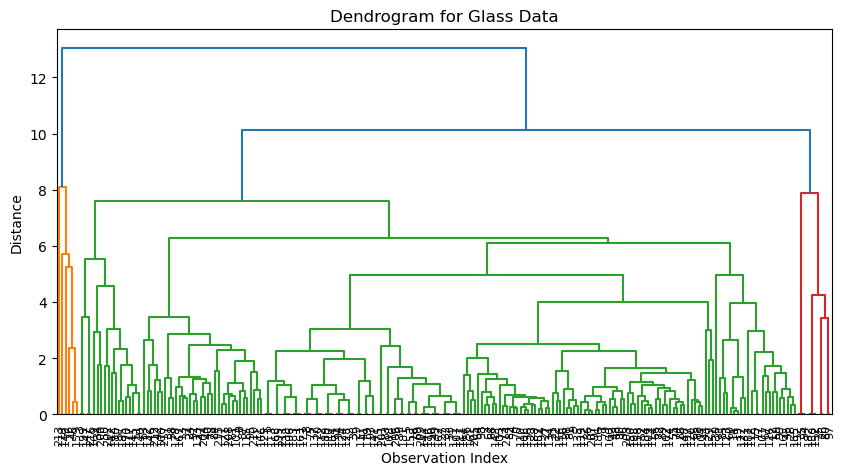

In [32]:
# plot dendrogram:

plt.figure(figsize=(10,5))
plt.title('Dendrogram for Glass Data')
dendrogram(linkage_matrix, labels=df_zscored.index, leaf_rotation=90, leaf_font_size=8)
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

    9. interpret the HCA dendrogram,  ( 1 point)

utilizing HCA clusters our data into three groups

HCA has drawbacks include:

1. Vagueness in terms of the termination criteria (that is, when to finalize the number of clusters)
2. The algorithm cannot adjust once the clustering decisions have been made
3. Can be very computationally expensive to build HCA models on large datasets with many features

To address some of the HCA shortcomings,  use k-means, which has the ability to adjust when the clusters have been initially generated. It is more computationally frugal than HCA.

    10. Compute Silhouette score to measure how close observations within a cluster and plot the results.  ( 2 points)

In [35]:
from scipy.cluster.hierarchy import linkage, fcluster
# Choose the number of clusters (you can use different methods to determine this)
num_clusters = 7  # Adjust as needed

# Assign cluster labels
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Calculate silhouette score
silhouette_avg = silhouette_score(df_zscored, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2211039487521177


In [51]:
silhouette_scores = []
for num_clusters in range(2, 11):
    cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(df_zscored, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.4%}')
    
# Choose the number of clusters with the highest Silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because we started from 2 clusters

# Assign clusters based on the optimal number
optimal_cluster_labels = fcluster(linkage_matrix, optimal_num_clusters, criterion='maxclust')

print("Optimal number of cluster: ", optimal_num_clusters)

Number of clusters: 2, Silhouette Score: 54.2782%
Number of clusters: 3, Silhouette Score: 43.4993%
Number of clusters: 4, Silhouette Score: 42.9072%
Number of clusters: 5, Silhouette Score: 40.2622%
Number of clusters: 6, Silhouette Score: 32.2543%
Number of clusters: 7, Silhouette Score: 22.1104%
Number of clusters: 8, Silhouette Score: 21.0618%
Number of clusters: 9, Silhouette Score: 21.0276%
Number of clusters: 10, Silhouette Score: 22.1348%
Optimal number of cluster:  2


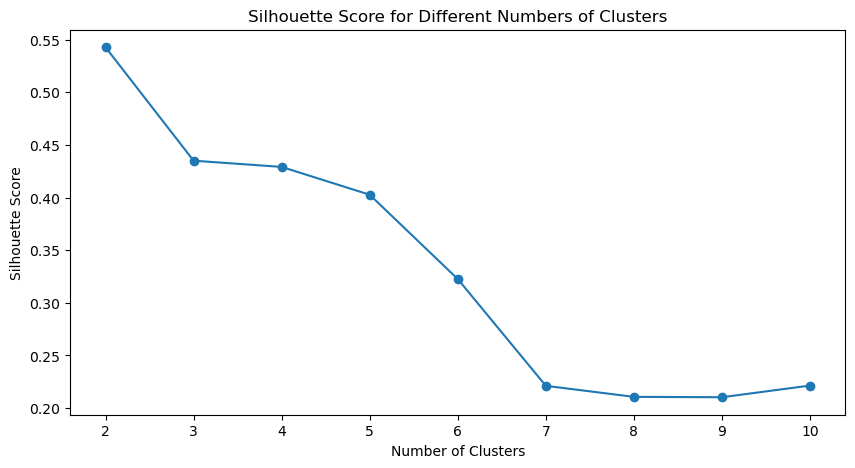

In [52]:

# Plot Silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

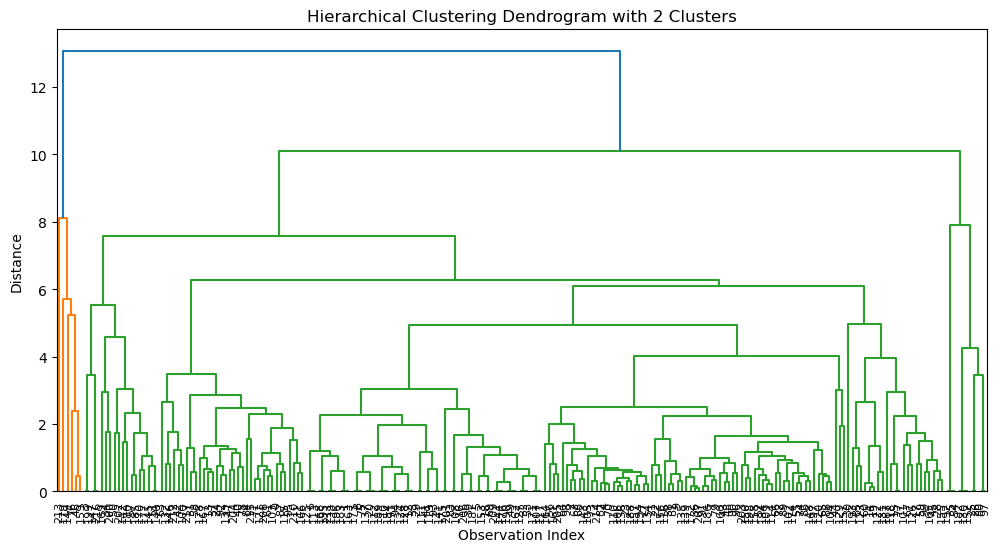

In [53]:
# Plot the dendrogram with optimal clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df_zscored.index, leaf_rotation=90, leaf_font_size=8, color_threshold=linkage_matrix[-optimal_num_clusters + 1, 2])
plt.title(f'Hierarchical Clustering Dendrogram with {optimal_num_clusters} Clusters')
plt.xlabel('Observation Index')
plt.ylabel('Distance')
plt.show()

    11. apply k-Means Clustering for Optimal Number of Clusters  ( 1 point)

In [60]:
# Store silhouette scores for each number of clusters
silhouette_scores = []

# Iterate over different numbers of clusters
for num_clusters in range(2, 11):
    # Fit k-Means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_zscored)
    
    # Compute silhouette score
    silhouette_avg = silhouette_score(df_zscored, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Optionally, print the silhouette score for each cluster
    print(f'Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg:.4%}')

# Choose the optimal number of clusters based on the maximum silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal Number of Clusters: {optimal_num_clusters}')


Number of clusters: 2, Silhouette Score: 40.6424%
Number of clusters: 3, Silhouette Score: 42.5590%
Number of clusters: 4, Silhouette Score: 39.4708%
Number of clusters: 5, Silhouette Score: 38.5711%
Number of clusters: 6, Silhouette Score: 41.7757%
Number of clusters: 7, Silhouette Score: 43.1995%
Number of clusters: 8, Silhouette Score: 41.2105%
Number of clusters: 9, Silhouette Score: 41.2632%
Number of clusters: 10, Silhouette Score: 38.3336%
Optimal Number of Clusters: 7


    12. print the number of glasses that fall within each of clusters. ( 2 points)

In [62]:
cluster_counts = pd.Series(cluster_labels).value_counts()
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster + 1}: {count} glasses")

Cluster 1: 76 glasses
Cluster 7: 34 glasses
Cluster 4: 27 glasses
Cluster 2: 22 glasses
Cluster 3: 21 glasses
Cluster 9: 21 glasses
Cluster 6: 7 glasses
Cluster 10: 6 glasses
Cluster 8: 3 glasses
Cluster 5: 1 glasses


    13. Using PCA to Transform Group-Related Features into Components  ( 1 point)

In [70]:
# Apply PCA
pca = PCA()
df_zscored_pca = pca.fit_transform(df_zscored)


    14. Get proportion of explained variance in each component ( 2 points)

In [71]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, variance_ratio in enumerate(explained_variance_ratio):
    print(f"Explained Variance for PC{i + 1}: {variance_ratio:.2%}")
   

Explained Variance for PC1: 35.31%
Explained Variance for PC2: 25.05%
Explained Variance for PC3: 12.52%
Explained Variance for PC4: 9.69%
Explained Variance for PC5: 9.26%
Explained Variance for PC6: 4.63%
Explained Variance for PC7: 2.77%
Explained Variance for PC8: 0.74%
Explained Variance for PC9: 0.01%


    15. Get the cumulative sum of explained variance by each component and plot the result.  ( 2 points)

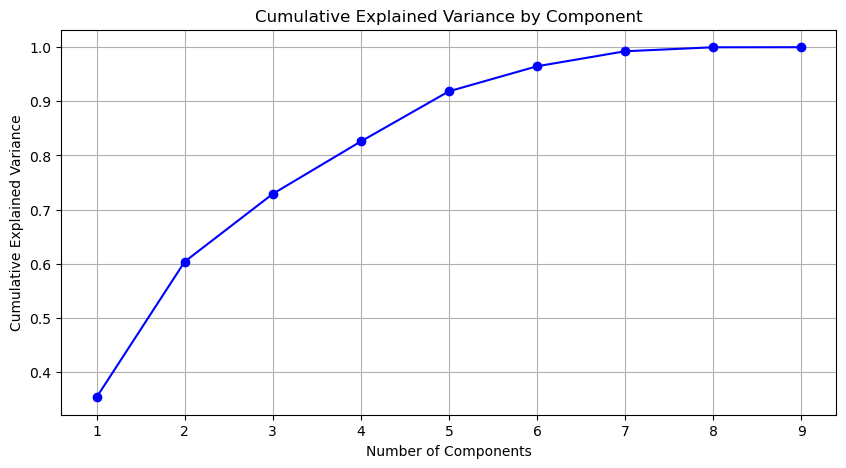

[0.35314362 0.60367619 0.72892091 0.82585676 0.91850472 0.96476788
 0.99251777 0.99989022 1.        ]


In [76]:
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.title("Cumulative Explained Variance by Component")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

print(cumulative_explained_variance)

    16. Fit the PCA model with the best number of components ( 2 points)

In [78]:
pca = PCA(n_components=5)
pca_components = pca.fit_transform(df_zscored)

    17. Plot the first and second components ( 2 points)

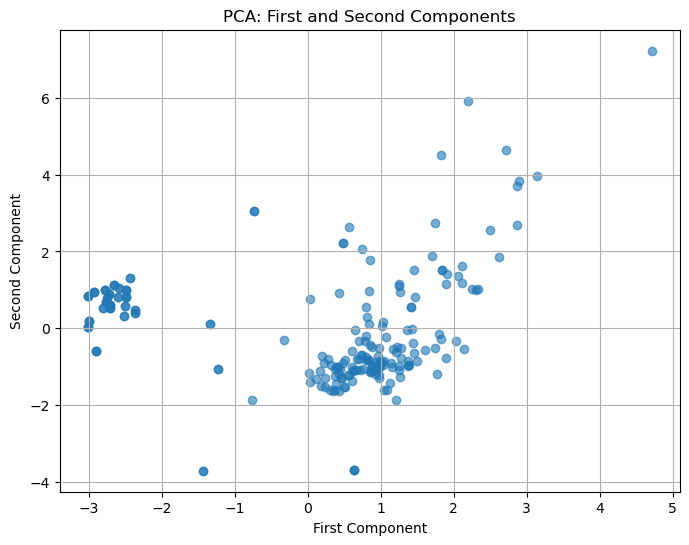

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.6)
plt.title("PCA: First and Second Components")
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.grid()
plt.show()